- 이상한 나라의 앨리스 소설의 영문 텍스트에 전처리 방식들을 적용해보고 그 결과를 워드클라우드로 시각화 해보자
- 워드클라우스 : 특정 단어의 빈도나 중요성을 글자의 크기로 나타낸 이미지

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드
import nltk    # nltk(Natural Language Toolkit): 영문자연어 처리 라이브러리
nltk.download('gutenberg')    # 저작권이 만료된 영어 소설들을 제공하는 구텐베르크 프로젝트 다운

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [3]:
from nltk.corpus import gutenberg
file_names = gutenberg.fileids()
print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [4]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
print('길이 :', len(doc_alice))
print(doc_alice[:500])

길이 : 144395
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


### 자연어 전처리
- 토큰화(tokenizing) : 문서에서 토큰이라 불리는 단위로 문장이나 단어를 나누는 작업(나누는 기준은 단어, 띄워쓰기, 형태소 등 여러가지 방식이 있음)
- 어간추출(Stemming) : 어간(단어의 의미를 담고있는 핵심부분) 추출
- 표제어추출(Lematization) : 표제어(기본 사전형 단어) 추출
- 불용어처리(Stopwords) : 일반적으로 분석대상이 아니거나 의미가 적은 단어 혹은 특수기호들을 제거

In [5]:
nltk.download('punkt')    # punkt : 자연어 처리 토큰화 관련 모델

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
# 1. 토큰화
from nltk.tokenize import word_tokenize

token_alice = word_tokenize(doc_alice)
print("토큰화 후 소설의 토큰 수 :", len(token_alice))
print(token_alice[:50])

토큰화 후 소설의 토큰 수 : 33494
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her']


In [ ]:
# 2. 어간추출
# nltk에서는 Porter, Lancaster, Regexp, Snowball 4가지의 Stemmer를 제공
# - Porter : Stemmer 중에서 가장 유명하여 1980년에 Porter씨가 제안
# - Lancaster : Lancaster 대학에서 개발
# - Regexp : 사용자가 지정한 정규표현을 기준으로 동작하며 Porter나 Lancaster가 처리하지 못하는 특수부분 처리시 사용
# - Snowball : 영어외에 13개 국가의 언어에 대한 Stemming을 제공

In [7]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stem_token_alice = [stemmer.stem(token) for token in token_alice]
print('스태밍 후 토큰수 :', len(stem_token_alice))
print(stem_token_alice[:50])

after stemming : 33494
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin', 'to', 'get', 'veri', 'tire', 'of', 'sit', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'have', 'noth', 'to', 'do', ':', 'onc', 'or', 'twice', 'she', 'had', 'peep', 'into', 'the', 'book', 'her']


In [8]:
# 3. 표제어 추출
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lem_tokens_alice = [lemmatizer.lemmatize(token) for token in token_alice]
print('표제어 추출 후 토큰수 :', len(lem_tokens_alice))
print(lem_tokens_alice[:50])

표제어 추출 후 토큰수 : 33494
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her']


### Regexp Stemmer와 tokenizer가 결합된 RegeXPTokenizer를 사용해 전처리
- 정규표현식: https://hamait.tistory.com/342

In [12]:
from nltk.tokenize import RegexpTokenizer
# 정규표현식 : 문자열에서 특정한 규칙을 가지는 문자열의 집합을 찾기위한 검색 패턴(찾고 싶은 문자만 검색)
# [\w'] : 문자, 숫자, _를 포함하며 대괄호, 작은 따옴표까지 검색 조건 설정
# {3,} : 3자리이상의 단어만 검색
tokenizer = RegexpTokenizer("[\w']{3,}")

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())

print('RegeXPTokenizer 적용 후 토큰 수 :', len(reg_tokens_alice))
print(reg_tokens_alice[:50])

RegeXPTokenizer 적용 후 토큰 수 : 21616
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister', 'the', 'bank', 'and', 'having', 'nothing', 'once', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', 'but', 'had', 'pictures', 'conversations', "'and", 'what', 'the', 'use', 'book', 'thought', 'alice', "'without", 'pictures']


In [13]:
# 불용어 처리
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords

english_stops = stopwords.words('english')    # 영문 불용어 처리

# 영문 불용어를 제외한 단어들로만 list를 생성
result_alice = [word for word in reg_tokens_alice if word not in english_stops]
print("영문 불용어 적용 후 토큰 수 :", len(result_alice))
print(result_alice[:50])

영문 불용어 적용 후 토큰 수 : 12999
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', "'and", 'use', 'book', 'thought', 'alice', "'without", 'pictures', 'conversation', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', 'whether', 'pleasure', 'making', 'daisy', 'chain', 'would', 'worth', 'trouble']


In [15]:
english_stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### 전처리 된 단어의 빈도 계산
- result_alice 리스트에 있는 단어의 개수를 세고 빈도수가 큰 순으로 딕셔너리 형태로 정렬

In [19]:
alice_word_count = {}

for word in result_alice:
  # alice_word_count.get(word, 0) : 딕셔너리 key값에 word가 들어갔을때 value값을 출력하며 key값이 없다면 0을 반
  alice_word_count[word] = alice_word_count.get(word, 0)+1

print('사용된 단어(토큰)수 :', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print("빈도수 상위 40개 단어")
for key in sorted_word_count[:40]:
  print(f"{key} : {alice_word_count[key]}", end=", ")

사용된 단어(토큰)수 : 2687
빈도수 상위 40개 단어 : 
said : 462, alice : 385, little : 128, one : 98, know : 88, like : 85, went : 83, would : 78, could : 77, thought : 74, time : 71, queen : 68, see : 67, king : 61, began : 58, turtle : 57, 'and : 56, way : 56, mock : 56, quite : 55, hatter : 55, gryphon : 55, think : 53, much : 51, say : 51, first : 50, head : 49, thing : 49, voice : 48, rabbit : 46, looked : 45, never : 45, got : 45, get : 44, must : 44, mouse : 42, round : 41, well : 40, came : 40, 'you : 40, 

In [20]:
from wordcloud import WordCloud

In [21]:
# generate : raw 텍스트에서 단어의 빈도를 자동 계산하여 워드클라우드 생성
wordcloud = WordCloud().generate(doc_alice)

- 보간법 참조 블로그 : https://blog.naver.com/aorigin/220947541918

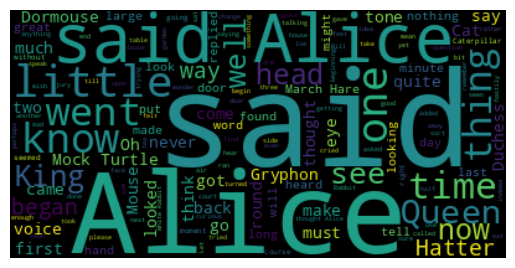

In [22]:
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

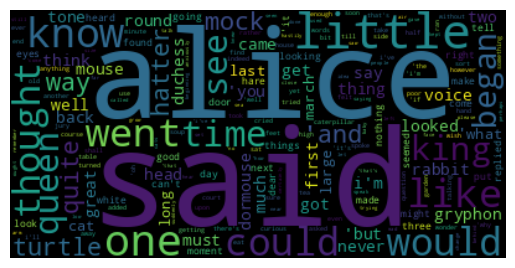

In [23]:
# 미리 정의된 딕셔너리에 있는 단어의 빈도수에 따라 워드클라우드 생성
wordcloud1 = WordCloud().generate_from_frequencies(alice_word_count)

plt.axis('off')
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()

### 우리가 원하는 배경에 워드클라우드 출력하기
- 색상표 : https://coolhamstersneversleep.tistory.com/entry/Python-%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C-%EC%83%89%EC%83%81%ED%91%9C

In [24]:
%cd /content/drive/MyDrive/sw캠프 데이터 비즈니스 과정

/content/drive/MyDrive/sw캠프 데이터 비즈니스 과정


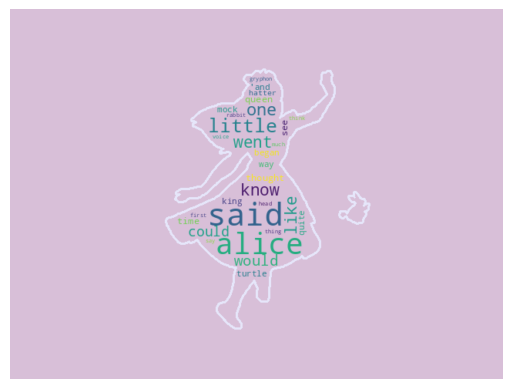

In [37]:
from PIL import Image

alice_mask = np.array(Image.open('data/alice_mask.png'))

wc = WordCloud(background_color='thistle',  # 워드 클라우드 배경색 지정
               max_words=30,              # 출력할 최대 단어 수
               mask=alice_mask,           # 배경으로 사용할 이미지
               contour_width=3,           # 테두리선의 크기
               contour_color='lavender') # 테두리선의 색상

# 워드 클라우드 생성
wc.generate_from_frequencies(alice_word_count)

# 워드 클라우스 생성 경과를 이미지 파일로 저장
wc.to_file('data/alice_wc.png')

# 화면에 출력하기
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()